In [2]:
from Data_Processor import Data_Processor
from Data_Processor import clean
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import os
import re
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly as py
import plotly.graph_objs as go
import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
import nltk
nltk.download('stopwords')
from string import punctuation
from collections import OrderedDict
import seaborn as sns
#import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import json
from pandas.io.json import json_normalize
import random
from Data_Processor import Data_Processor

init_notebook_mode(connected=True) #do not miss this line
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to /Users/zhuying/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/zhuying/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhuying/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhuying/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def datelist(start_month, end_month):
    start_year = int(start_month[:4])
    start_month = int(start_month[-2:])
    end_year = int(end_month[:4])
    end_month = int(end_month[-2:])
    if start_year == end_year:
        month_range = range(start_month, end_month + 1)
        date_list = ["{year}-{month:0=2d}".format(year=str(start_year), month=M) for M in month_range]
        return date_list
    year_range = range(start_year + 1, end_year)
    start_year_month_range = range(start_month, 13)
    end_year_month_range = range(1, end_month + 1)
    date_list = ["{year}-{month:0=2d}".format(year=str(start_year), month=M) for M in start_year_month_range]
    date_list += ["{year}-{month:0=2d}".format(year=str(Y), month=M) for Y in year_range for M in range(1, 13)]
    date_list += ["{year}-{month:0=2d}".format(year=str(end_year), month=M) for M in end_year_month_range]
    return date_list

In [7]:
start_month='2017-06'
end_month='2020-05'
DP=Data_Processor(start_month,end_month,
                  template=["Morgan_Stanley0/Morgan_Stanley"])
DP.readdata()
print(DP.datanums())
DP.specifylang()
#noise=DP.removenoise() 
DP.clean()
print(DP.datanums())
col=['retweets','likes','sentiment','sentiment_score','tweet_id','tweet_url','text','text_html','links','hashtags', 'img_urls','timestamp','timestamp_epochs','replies','username','screen_name','user_id','is_reply_to','is_replied','reply_to_users','parent_tweet_id','has_media','label','score']
tweets = pd.DataFrame(columns=col)
for i in range(len(DP.data)):
    d = pd.DataFrame(DP.data[i],columns=col)
    tweets = tweets.append(d)


([2128, 2491, 2769, 2497, 2422, 2480, 2386, 2562, 2220, 2035, 2125, 2877, 2601, 2065, 2145, 2744, 2095, 1884, 2461, 1845, 2045, 2657, 2297, 2875, 2646, 1631, 2030, 2537, 2127, 2121, 2056, 2388, 2241, 2556, 2489, 2710], 84238)
([2126, 2490, 2768, 2494, 2421, 2478, 2383, 2561, 2218, 2035, 2124, 2876, 2599, 2064, 2144, 2741, 2094, 1884, 2459, 1844, 2045, 2657, 2296, 2874, 2644, 1630, 2030, 2536, 2127, 2120, 2055, 2387, 2238, 2556, 2489, 2710], 84197)


In [8]:
tweets

,retweets,likes,sentiment,sentiment_score,tweet_id,tweet_url,text,text_html,links,hashtags,...,username,screen_name,user_id,is_reply_to,is_replied,reply_to_users,parent_tweet_id,has_media,label,score
0,0,0,Negative,1,874053179520020481,/Shirley20301591/status/874053179520020481,If you dont like God if you want abortionwant ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],[],...,meamae,Shirley20301591,773275308640260096,True,True,"[{'screen_name': 'Shirley20301591', 'user_id':...",846716423674249218,False,NaN,NaN
1,0,0,Neutral,2,874051170985271296,/Shirley20301591/status/874051170985271296,He divided our country He forgot he is half wh...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],[],...,meamae,Shirley20301591,773275308640260096,True,True,"[{'screen_name': 'Shirley20301591', 'user_id':...",846716423674249218,False,NaN,NaN
2,0,0,Positive,3,874049702953705473,/Shirley20301591/status/874049702953705473,abortion up to day birth Murdering baby before...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],[],...,meamae,Shirley20301591,773275308640260096,True,True,"[{'screen_name': 'Shirley20301591', 'user_id':...",846716423674249218,False,NaN,NaN
3,0,0,Negative,1,874048232057339904,/Shirley20301591/status/874048232057339904,If you where a Christian and God was taking ou...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],[],...,meamae,Shirley20301591,773275308640260096,True,True,"[{'screen_name': 'Shirley20301591', 'user_id':...",846716423674249218,False,NaN,NaN
4,0,1,Negative,1,874046676889214976,/Shirley20301591/status/874046676889214976,Obama was the worst president ever my insuranc...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],[],...,meamae,Shirley20301591,773275308640260096,True,True,"[{'screen_name': 'DaleInnis', 'user_id': '5474...",846716423674249218,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2705,2,1,Neutral,2,1260182252052496385,/NT_CTannenbaum/status/1260182252052496385,This chart from AlphaWise and MorganStanley su...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],[],...,Carl R. Tannenbaum,NT_CTannenbaum,4149739878,False,False,[],,True,NaN,NaN
2706,4,26,Neutral,2,1260180670091079683,/D_Jimenez_Sch/status/1260180670091079683,Join us this Friday May th at am EST talking a...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[https://morganstanley.webcasts.com/starthere....,[],...,Daniel Jimenez Sch,D_Jimenez_Sch,293613938,False,True,[],,True,NaN,NaN
2707,0,1,Neutral,2,1260179290072576001,/stockhoot/status/1260179290072576001,CYTK Morgan Stanley Maintains to Overweight PT,"<p class=""TweetTextSize js-tweet-text tweet-te...",[https://stockhoot.com/ExtSymbol.aspx?from=Ana...,[],...,@Stockhoot,stockhoot,773275476748099585,False,False,[],,False,NaN,NaN
2708,0,1,Neutral,2,1260174442149425152,/AnalystWire/status/1260174442149425152,UPDATE The Tesla TSLA Conspiracy Theory Morgan...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[http://streetinsider.com/r/16869181],[],...,SIAnalystWire,AnalystWire,818081647,False,False,[],,False,NaN,NaN


In [12]:
tweets_   = (tweets[(tweets["retweets"] == 0)].reset_index()
                  .drop(columns = ["index"],axis = 1))

# with retweets
tweets_retweets   = (tweets[(tweets["retweets"] != 0)].reset_index()
                                  .drop(columns = ["index"],axis = 1))

In [20]:
tweets_retweets["retweets"].value_counts()

1       14126
2        4508
3        2259
4        1244
5         852
        ...  
187         1
183         1
178         1
173         1
1842        1
Name: retweets, Length: 207, dtype: int64

# Percentage of retweets

Text(0.5, 1.0, 'Percentage of retweets ')

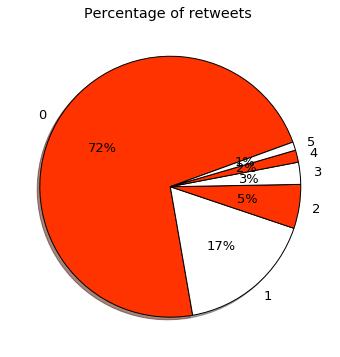

In [19]:
plt.style.use('ggplot')

plt.figure(figsize = (13,6))
plt.subplot(121)
tweets["retweets"].value_counts()[:6].plot.pie(autopct = "%1.0f%%",
                                                                wedgeprops = {"linewidth" : 1,
                                                                              "edgecolor" : "k"},
                                                                shadow = True,fontsize = 13,
                                                                #explode = [.1,0.09],
                                                                startangle = 20,
                                                                colors = ["#FF3300","w"]
                                                               )
plt.ylabel("")
plt.title("Percentage of retweets ")

Text(0.5, 1.0, 'Percentage of retweets ')

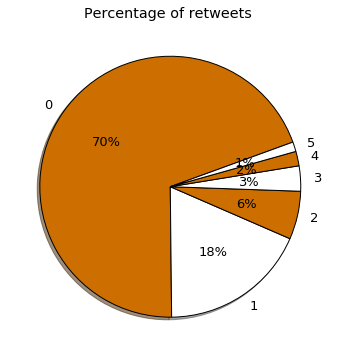

In [27]:
plt.style.use('ggplot')

plt.figure(figsize = (13,6))
plt.subplot(121)
tweets[tweets['sentiment']=='Positive']["retweets"].value_counts()[:6].plot.pie(autopct = "%1.0f%%",
                                                                wedgeprops = {"linewidth" : 1,
                                                                              "edgecolor" : "k"},
                                                                shadow = True,fontsize = 13,
                                                                #explode = [.1,0.09],
                                                                startangle = 20,
                                                                colors = ["#CC6F00","w"]
                                                               )
plt.ylabel("")
plt.title("Percentage of retweets ")

# original authors of retweets

Text(0.5, 1.0, 'original authors of retweets ')

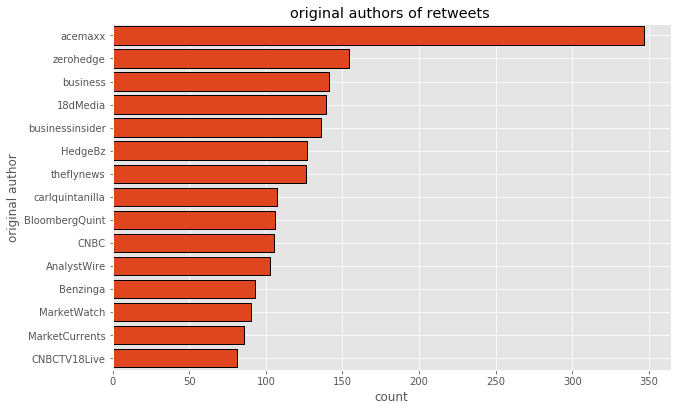

In [30]:
plt.figure(figsize = (10,14))

plt.subplot(211)
authors = tweets_retweets["screen_name"].value_counts().reset_index()
sns.barplot(y = authors["index"][:15] , 
            x = authors["screen_name"][:15] ,
            linewidth = 1,edgecolor = "k",color = "#FF3300")
plt.grid(True)
plt.xlabel("count")
plt.ylabel("original author")
plt.title("original authors of retweets ")

# favorite and retweets by sentiment

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


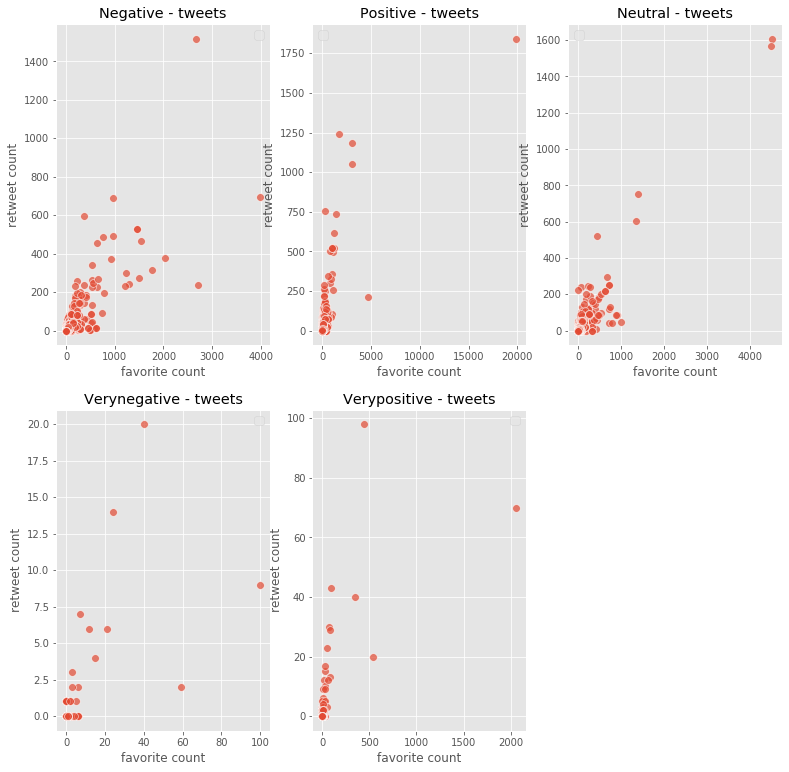

In [37]:
import itertools
lst =  ['Negative', 'Positive' ,'Neutral','Verynegative','Verypositive']
cs  =  ["r","g","b"]

plt.figure(figsize = (13,13))

for i,j,k in itertools.zip_longest(lst,range(len(lst)),cs) :
    plt.subplot(2,3,j+1)
    plt.scatter(x = tweets[tweets["sentiment"] == i]["likes"],
                y = tweets[tweets["sentiment"] == i]["retweets"],
                linewidth = .7,edgecolor = "w",s = 60,alpha = .7)
    plt.title(i + " - tweets")
    plt.legend(loc = "best",prop = {"size":12})
    plt.xlabel("favorite count")
    plt.ylabel("retweet count")


# Average retweets and favorites by sentiment

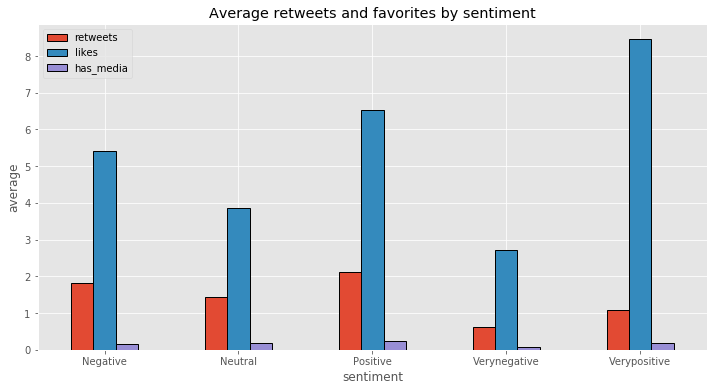

In [53]:
avg_fv_rts_t = tweets.groupby("sentiment")[["retweets","likes",'has_media']].sum()/tweets.groupby("sentiment")[["retweets","likes",'has_media']].count()


avg_fv_rts_t.plot(kind = "bar",figsize = (12,6),linewidth = 1,edgecolor = "k")
plt.xticks(rotation = 0)
plt.ylabel("average")
plt.title("Average retweets and favorites by sentiment")

plt.show()


# Network analysis of tweets

In [28]:
DPw=Data_Processor(start_month='2020-03',end_month='2020-05',
                  template=["Morgan_Stanley0/Morgan_Stanley"])
DPw.readdata(weekly=False)
print(DPw.datanums())
DPw.specifylang()
#noise=DPw.removenoise() 
DPw.clean()
print(DPw.datanums())
DPw.addstopwords(['morganstanley','bank','say','year','sachs','could','would','go','know'])
DPw.tokenizetext()

([2556, 2489, 2710], 7755)
([2556, 2489, 2710], 7755)


In [29]:
col=['retweets','likes','sentiment','sentiment_score','tweet_id','tweet_url','text','text_html','links','hashtags', 'img_urls','timestamp','timestamp_epochs','replies','username','screen_name','user_id','is_reply_to','is_replied','reply_to_users','parent_tweet_id','has_media']
tweet = pd.DataFrame(columns=col)
for i in range(len(DPw.data)):
    d = pd.DataFrame(DPw.data[i],columns=col)
    tweet = tweet.append(d)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx

def network_tweets(df,frequency,color,title) :
    #documents
    documents  = df["text"].tolist()
    vectorizer = CountVectorizer()
    vec        = vectorizer.fit_transform(documents)
    vec_t      = vectorizer.fit_transform(documents).transpose()
    
    #adjecency matrix for words
    adj_mat    = pd.DataFrame((vec_t * vec).toarray(),
                              columns = vectorizer.get_feature_names(),
                              index    = vectorizer.get_feature_names()
                             )
    # #stacking combinations
    adj_mat_stack   = adj_mat.stack().reset_index()
    adj_mat_stack.columns = ["link_1","link_2","count"]
    #drop same word combinations
    adj_mat_stack   = adj_mat_stack[adj_mat_stack["link_1"] !=
                                    adj_mat_stack["link_2"]] 
    
    #subset dataframe with combination count greater than 25 times
    network_sub = adj_mat_stack[adj_mat_stack["count"] > frequency]
    
    #plot network
    H = nx.from_pandas_edgelist(network_sub,"link_1","link_2",["count"],
                                create_using = nx.DiGraph())

    ax = plt.figure(figsize = (11,11))
    nx.draw(H,with_labels = True,alpha = .7,node_shape = "H",
            width = 1,node_color = color,
            font_weight = "bold",style = "solid", arrowsize = 15 ,
            font_color = "white",linewidths = 10,edge_color = "grey",
            node_size = 1300,pos = nx.kamada_kawai_layout(H))
    plt.title(title,color = "white")
    ax.set_facecolor("k")


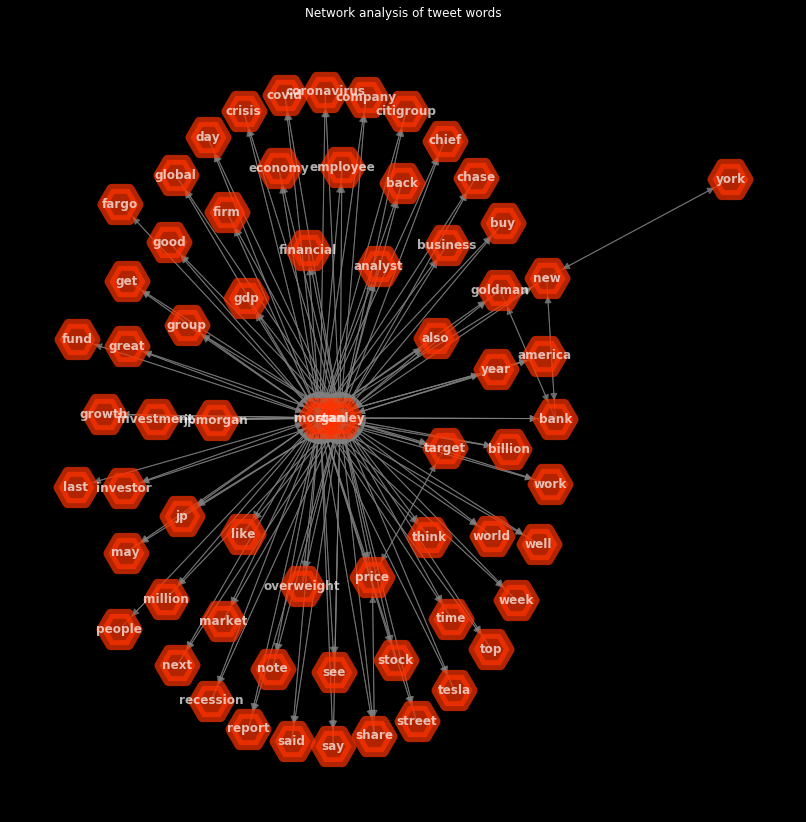

In [32]:
network_tweets(tweet[tweet['sentiment']=='Positive'],40,"#FF3300","Network analysis of tweet words")

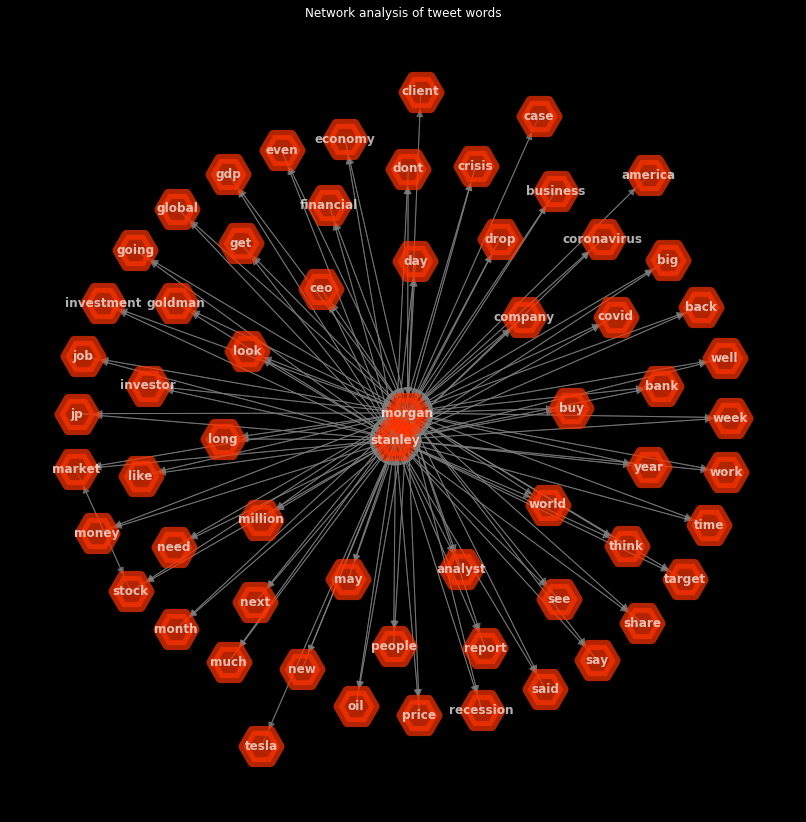

In [33]:
network_tweets(tweet[tweet['sentiment']=='Negative'],45,"#FF3300","Network analysis of tweet words")

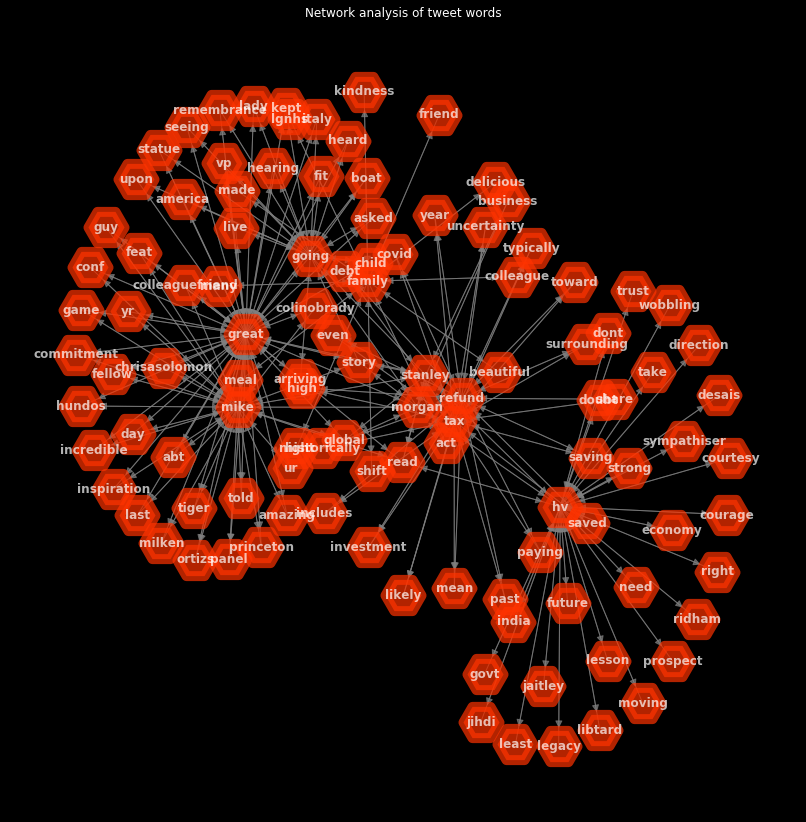

In [36]:
network_tweets(tweet[tweet['sentiment']=='Verypositive'],1,"#FF3300","Network analysis of tweet words")

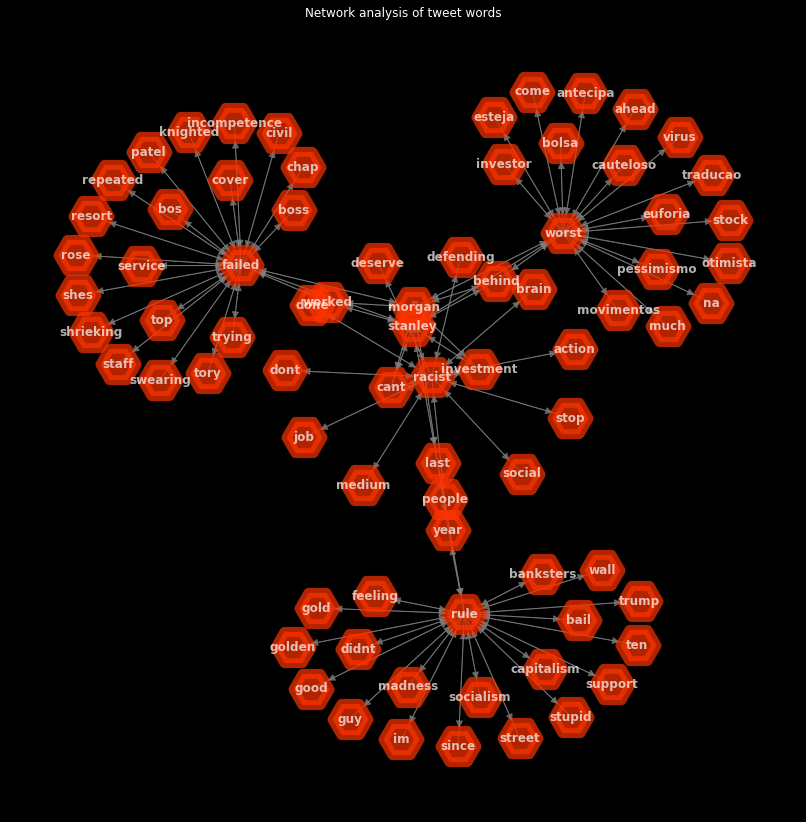

In [35]:
network_tweets(tweet[tweet['sentiment']=='Verynegative'],1,"#FF3300","Network analysis of tweet words")

In [ ]:
DP.users()
DP.userdata('acemaxx')
DP.textdata()['2018-03'][2]
DP.tokenizetext()

In [16]:
for string in somedata:
    print(DP.getngrams(data=string,num=1,lemma=True))

['love', 'nlp']
['intersting']
['thank', 'morgran', 'stanley', 'holding', 'competition']


In [18]:
unigrams=DP.getngrams(num=1,lemma=True)
DP.getfreq(unigrams)

[('stanley', 45629),
 ('morganstanley', 12885),
 ('u', 5890),
 ('bank', 5445),
 ('market', 4696),
 ('say', 4549),
 ('year', 4372),
 ('stock', 3958),
 ('like', 3726),
 ('new', 3537),
 ('price', 3535),
 ('goldman', 3467),
 ('get', 3231),
 ('company', 3106),
 ('see', 2812),
 ('target', 2804),
 ('time', 2717),
 ('share', 2687),
 ('sachs', 2683),
 ('dont', 2552),
 ('people', 2546),
 ('money', 2536),
 ('well', 2519),
 ('could', 2412),
 ('would', 2410),
 ('global', 2344),
 ('good', 2315),
 ('investment', 2306),
 ('business', 2301),
 ('financial', 2295),
 ('day', 2162),
 ('great', 2141),
 ('need', 2083),
 ('analyst', 2077),
 ('go', 1967),
 ('think', 1945),
 ('next', 1922),
 ('billion', 1922),
 ('know', 1902),
 ('work', 1854),
 ('report', 1833),
 ('investor', 1825),
 ('big', 1779),
 ('buy', 1744),
 ('world', 1737),
 ('tesla', 1710),
 ('growth', 1700),
 ('trump', 1682),
 ('may', 1639),
 ('cut', 1629),
 ('fund', 1614),
 ('week', 1604),
 ('last', 1602),
 ('back', 1597),
 ('million', 1587),
 ('want

In [19]:
DP.tfidf(unigrams) #input must be unigrams

,according,according stanley,account,actually,adam,adam jonas,advisor,ago,already,also,...,world,worth,would,wrong,year,yes,yet,york,youre,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.441875,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.25767,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
84193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
84194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
84195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0


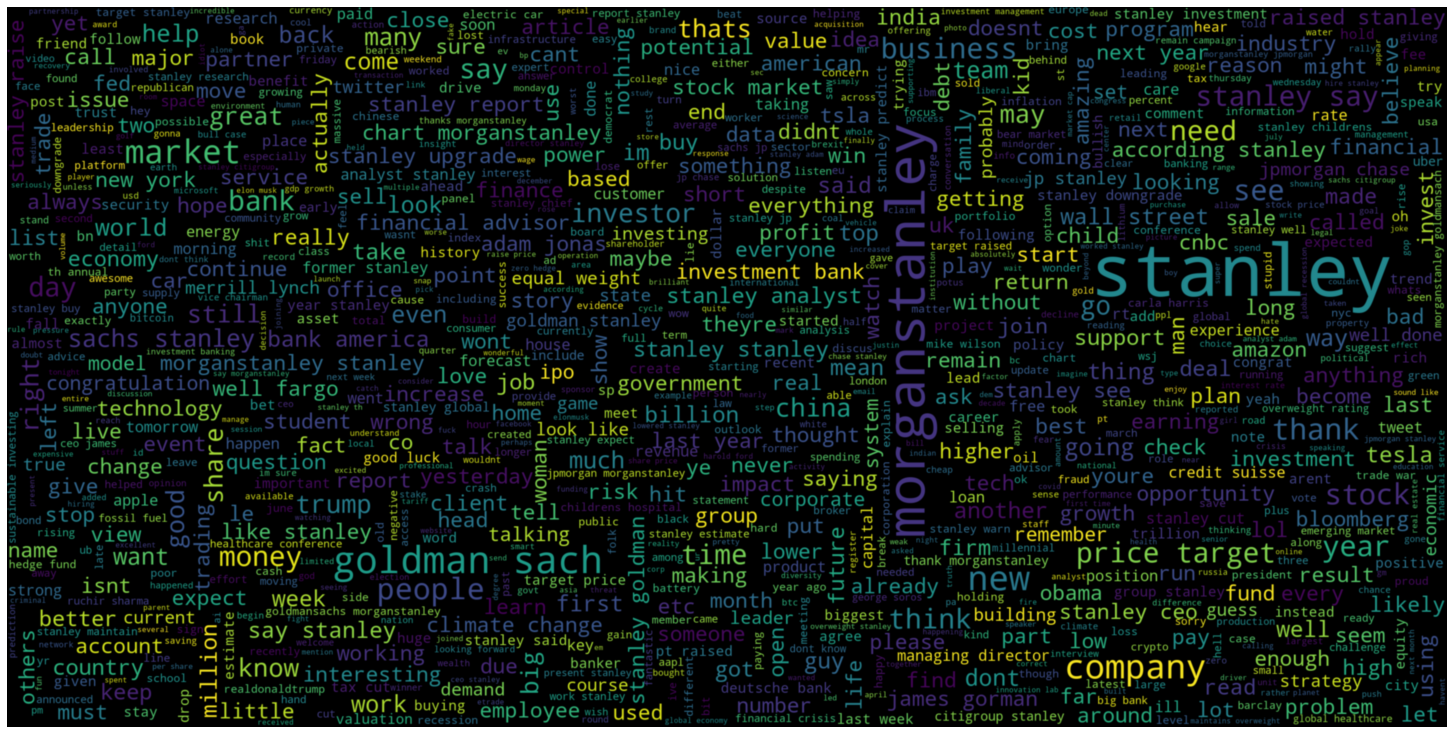

In [20]:
DP.wordcld(unigrams) #input must be unigrams